In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import DivergingNorm
import sys
sys.path.insert(1, '../../../utils/')
import src_utils
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import scipy

# 1. Set rcParams

In [2]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rcParams['axes.linewidth'] = 0.5

plt.rcParams["figure.dpi"] = 300

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

perc_axes = 0.07409181787428054


# 2. Set up grid

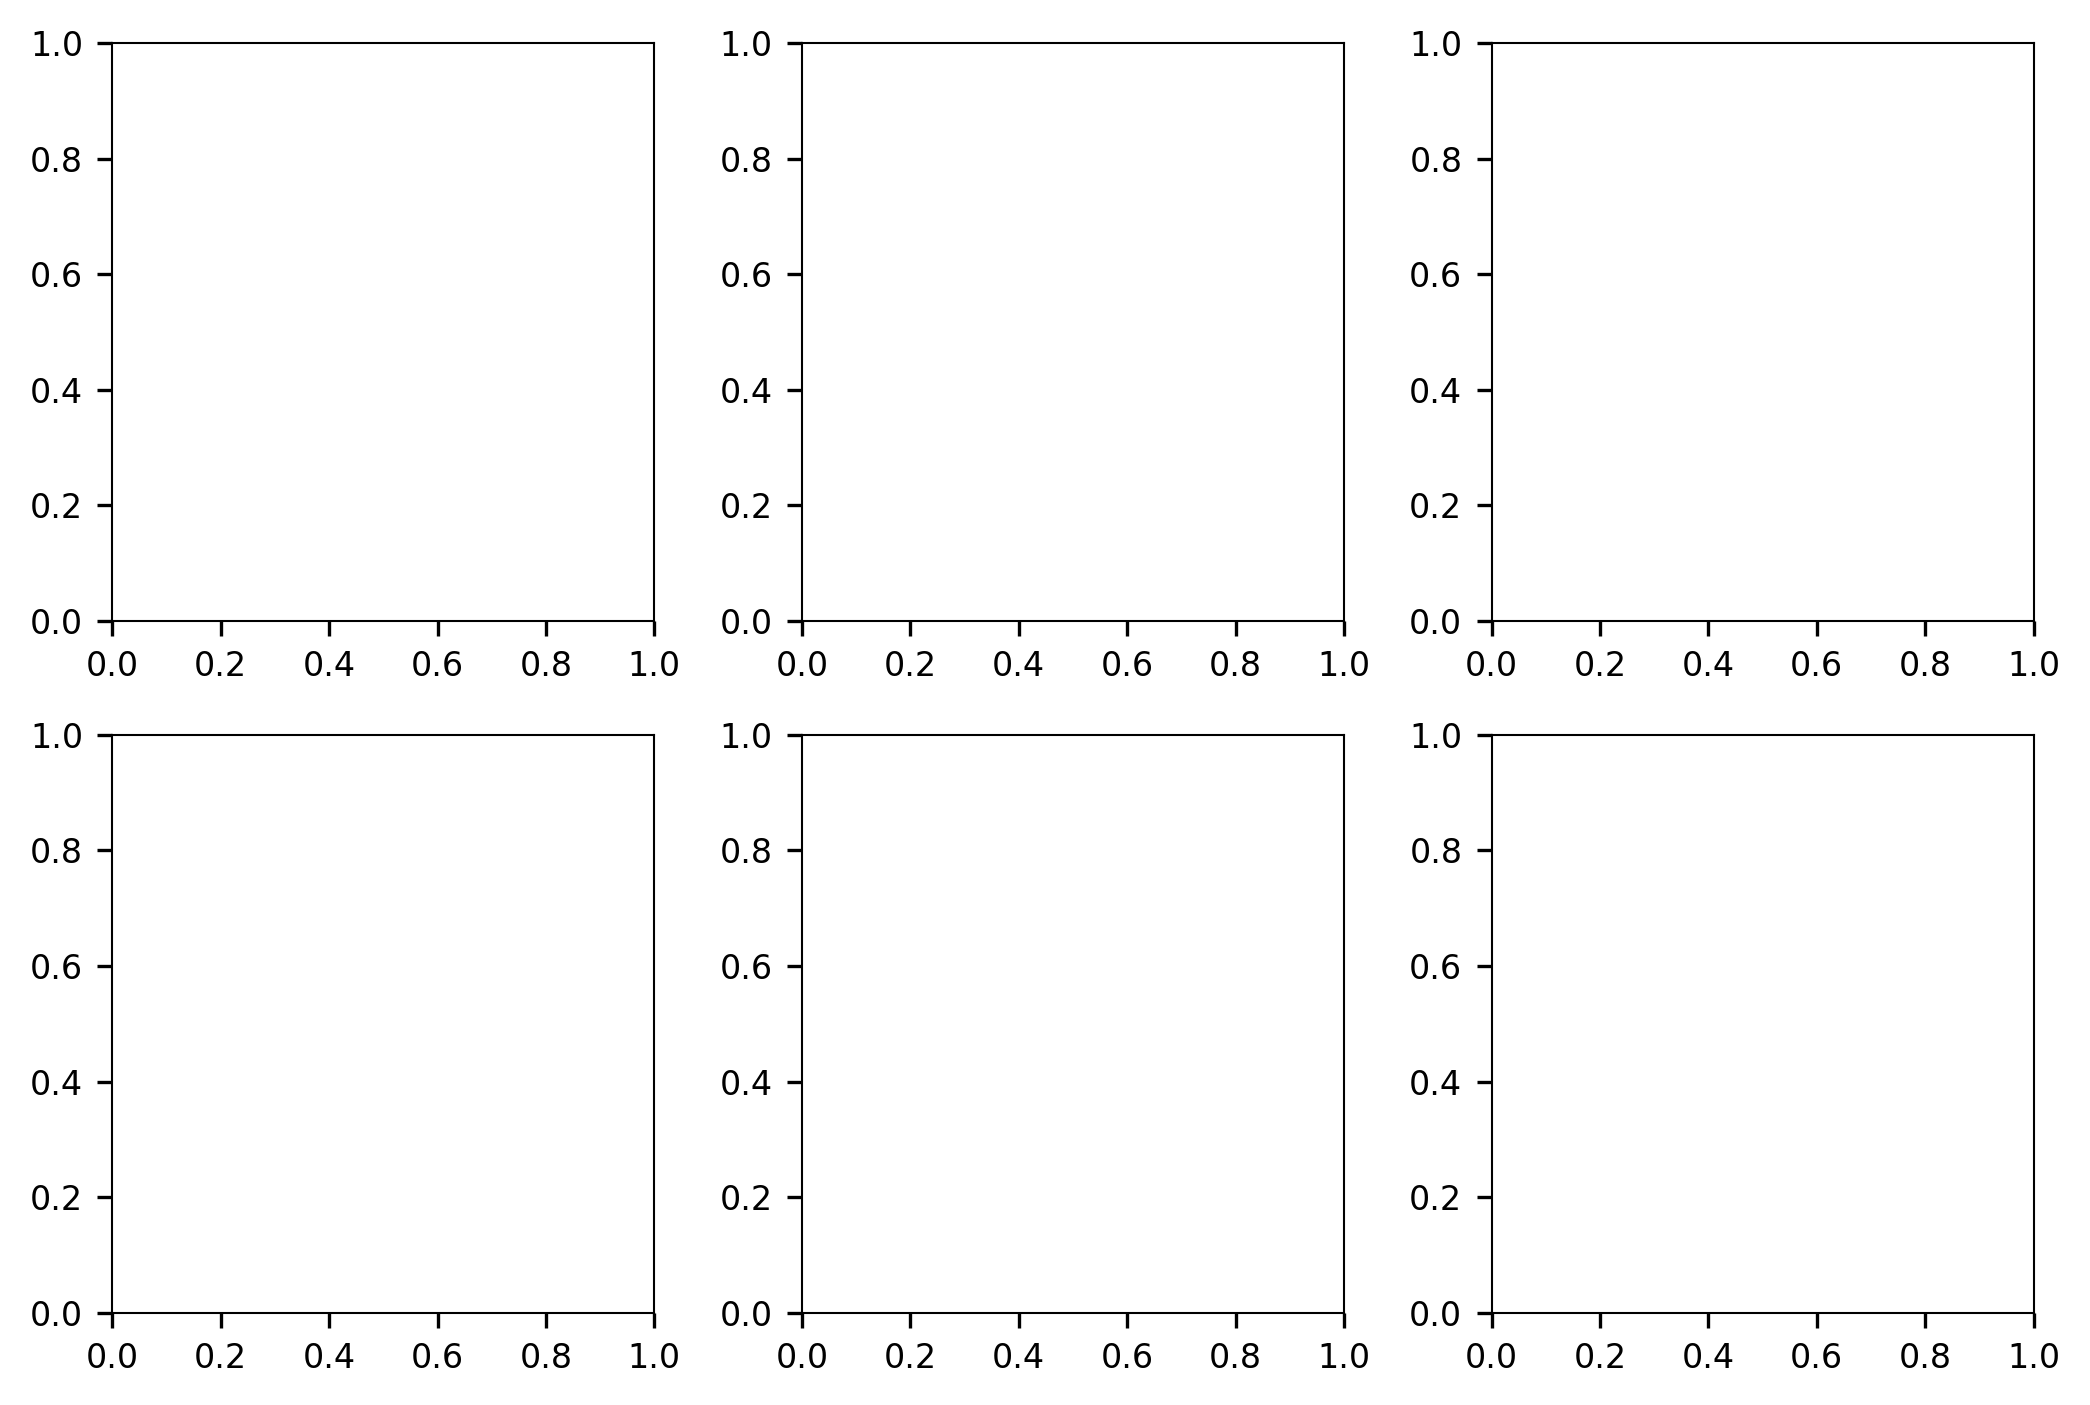

In [3]:
width = 174 / 25.4
height = 116 / 25.4
fig3 = plt.figure(constrained_layout=True, figsize=(width, height))
gs = fig3.add_gridspec(2, 3)
f3_ax1 = fig3.add_subplot(gs[0, 0])
f3_ax2 = fig3.add_subplot(gs[0, 1])
f3_ax3 = fig3.add_subplot(gs[0, 2])
f3_ax4 = fig3.add_subplot(gs[1, 0])
f3_ax5 = fig3.add_subplot(gs[1, 1])
f3_ax6 = fig3.add_subplot(gs[1, 2])

# B. DMSO replicate correlation

In [7]:
raw_data = pd.HDFStore('../../../raw_data/2017.07.24_Radicicol_exp.h5')

# ONLY USE DMSO SCORES FOR REP1 and REP2
variant_scores = raw_data.select('/main/synonymous/scores_shared')
rep1 = -1 * variant_scores.loc[:, ('Zero', 'Zero1', 'score')].values
rep2 = -1 * variant_scores.loc[:, ('Zero', 'Zero2', 'score')].values


# Combine replicates into a dataframe to drop variants with NaNs
rep_df = pd.DataFrame([rep1, rep2]).T
rep_df.dropna(inplace=True)

# Plot on grid
f3_ax2.scatter(rep_df[0], rep_df[1], c='k', alpha=0.2)

# Calculate correlation coefficient using scipy and plot on graph
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(rep_df[0], rep_df[1])

# Get limits
#min_x, max_x = f3_ax2.get_xlim()
#min_y, max_y = f3_ax2.get_ylim()
#x_range = max_x - min_x
#y_range = max_y - min_y
min_val = min(f3_ax2.get_xlim()[0], f3_ax2.get_ylim()[0])
max_val = max(f3_ax2.get_xlim()[1], f3_ax2.get_ylim()[1])
score_range = max_val - min_val
f3_ax2.set_xlim((min_val, max_val))
f3_ax2.set_ylim((min_val, max_val))

# Assign text position
f3_ax2.text(min_val + perc_axes * score_range, max_val - perc_axes * score_range, '$r$ = %0.2f' % r_value)

# Set axes labels
f3_ax2.set_xlabel('Rep1 DMSO activity score')
f3_ax2.set_ylabel('Rep2 DMSO activity score')

Text(702.9396325459321, 0.5, 'Rep2 DMSO activity score')

# A. Radicicol replicate correlation

In [65]:
# Create a store of h5 file
raw_data = pd.HDFStore('../../../raw_data/2017.07.24_Radicicol_exp.h5')
raw_data_keys = raw_data.keys()

# ONLY USE RADICICOL SCORES FOR REP1 and REP2
variant_scores = raw_data.select('/main/synonymous/scores_shared')
rep1 = -1 * np.concatenate(
    (
        variant_scores.loc[:, ('Radicicol', 'Rad1', 'score')].values,
        #variant_scores.loc[:, ('Zero', 'Zero1', 'score')].values
    )
)
rep2 = -1 * np.concatenate(
    (
        variant_scores.loc[:, ('Radicicol', 'Rad2', 'score')].values,
        #variant_scores.loc[:, ('Zero', 'Zero2', 'score')].values
    )
)

# Combine replicates into a dataframe to drop variants with NaNs
rep_df = pd.DataFrame([rep1, rep2]).T
rep_df.dropna(inplace=True)

# Plot on grid
f3_ax1.scatter(rep_df[0], rep_df[1], c='k', alpha=0.2)

# Calculate correlation coefficient using scipy and plot on graph
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(rep_df[0], rep_df[1])

# Get limits
#min_x, max_x = f3_ax1.get_xlim()
#min_y, max_y = f3_ax1.get_ylim()
#x_range = max_x - min_x
#y_range = max_y - min_y
#min_val = min(f3_ax1.get_xlim()[0], f3_ax1.get_ylim()[0])
#max_val = max(f3_ax1.get_xlim()[1], f3_ax1.get_ylim()[1])
#score_range = max_val - min_val
f3_ax1.set_xlim((min_val, max_val))
f3_ax1.set_ylim((min_val, max_val))

# Assign text position
f3_ax1.text(min_val + perc_axes * score_range, max_val - perc_axes * score_range, '$r$ = %0.2f' % r_value)

# Set axes labels
f3_ax1.set_xlabel('Rep1 radicicol activity score')
f3_ax1.set_ylabel('Rep2 radicicol activity score')

Text(74.00000000000001, 0.5, 'Rep2 radicicol activity score')

# B. Synonymous and nonsynonymous distributions

0.11626839482365992 0.48175488865231625 -0.8472413824809726 1.0797781721282924
synon IQR 0.3249890165989129
nonsynon IQR 0.9385564459194519


Text(776.7150500103301, 0.5, 'Density')

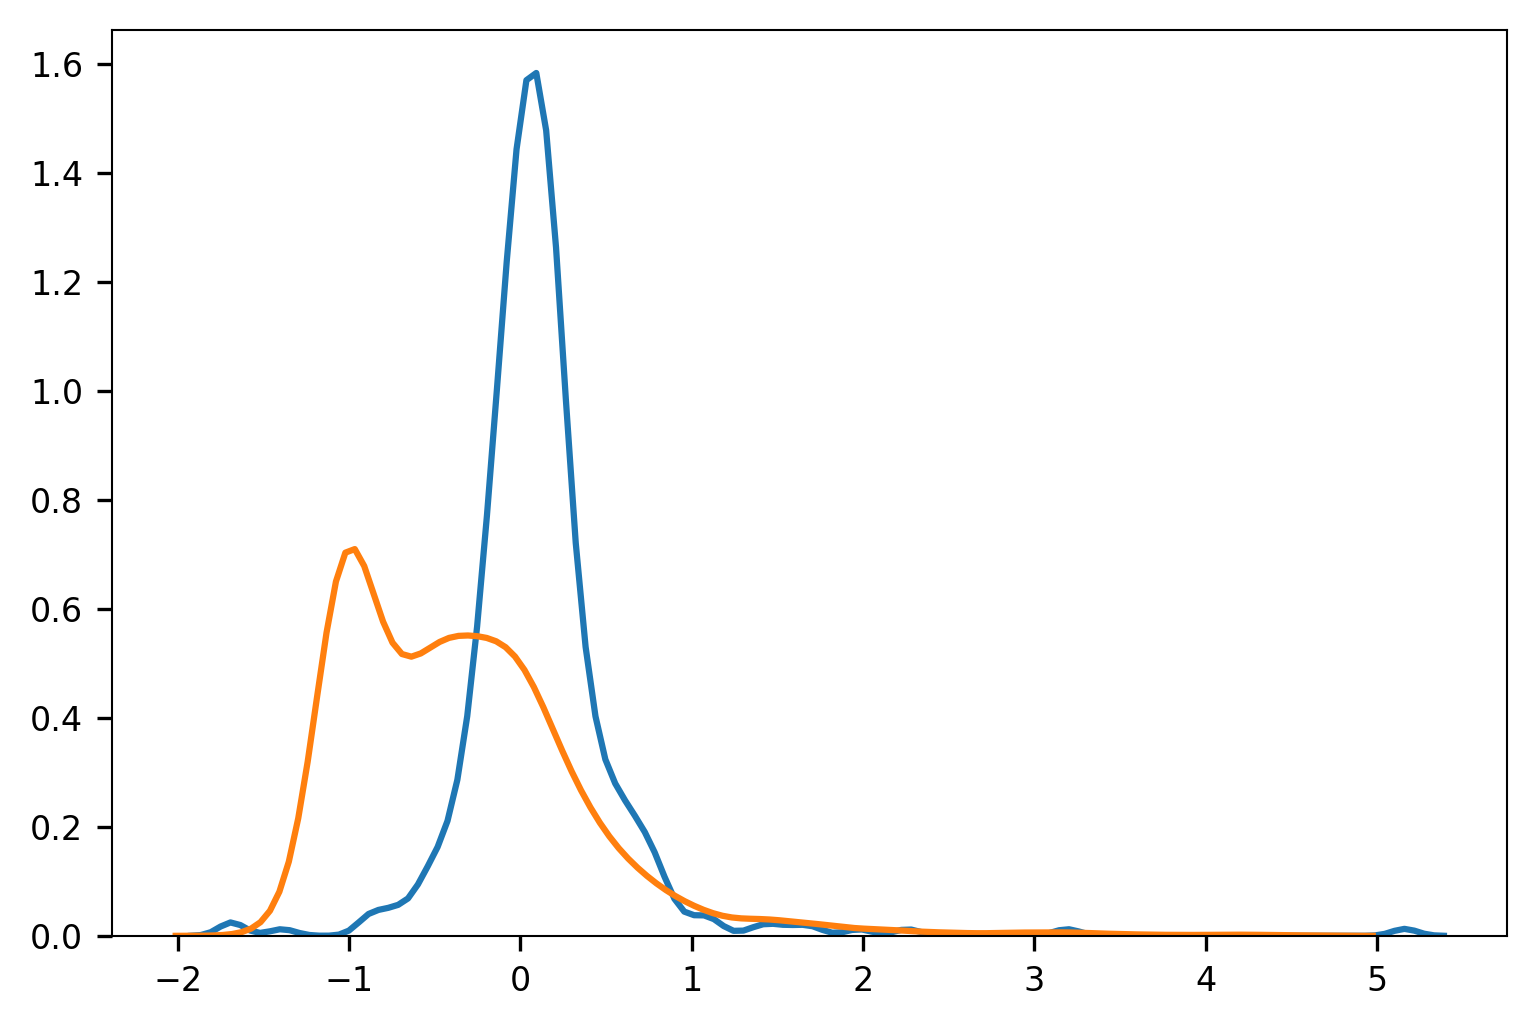

In [81]:
ax = f3_ax5
# Get nucleotide variants to differentiate synonymous and nonsynon
variants = raw_data.select('/main/variants/scores_shared')

# Separate into nonsyn and syn lists
synon = []
nonsynon = []
synon_names = []  # This was manually confirmed to be correct later
for variant in variants.index.tolist():
    if (variant.count('(p.=)') == variant.count('(p.')) or (variant == "_wt"):
        synon.append(variants.loc[variant].values[1::2][2:])
        synon_names.append(variant)
    else:
        nonsynon.append(variants.loc[variant].values[1::2][2:])
        
# Flip scores because of negative selection
synon = -1 * np.array(synon).flatten()
#nonsynon = -1 * np.array(nonsynon).flatten()
nonsynon = pd.read_csv('../../../utils/point_muts.csv', index_col=0, header=[0,1])[2:].loc[:, ('Radicicol', 'score')].values

# Use seaborn to get the density plot
synon_plot = sns.distplot(synon, hist=False)
synon_mean = np.nanmean(synon)
synon_sd = np.nanstd(synon)
print(synon_mean, synon_sd, synon_mean - 2 * synon_sd, synon_mean + 2 * synon_sd)
print('synon IQR', scipy.stats.iqr(synon, nan_policy='omit'))
print('nonsynon IQR', scipy.stats.iqr(nonsynon))
nonsynon_plot = sns.distplot(nonsynon, hist=False)

# Get data from seaborn plots
synon_lines = synon_plot.get_lines()[0].get_data()
nonsynon_lines = nonsynon_plot.get_lines()[1].get_data()

# Plot lines
norm_syn = synon_lines[1] / max(synon_lines[1])
norm_nonsynon = nonsynon_lines[1] / max(nonsynon_lines[1])
ax.plot(synon_lines[0], norm_syn, c='k')
ax.plot(nonsynon_lines[0], norm_nonsynon, c='k')

# Plot limits
ax.set_xlim([min_val, max_val])
ax.set_ylim([0, 1.4])

# Fill under the curve
ns_color = 'lightgrey'
s_color = 'grey'
ax.fill_between(nonsynon_lines[0], 0, norm_nonsynon, color=ns_color)
ax.fill_between(synon_lines[0], 0, norm_syn, color=s_color)

# Custom legend
legend_elements = [
    matplotlib.patches.Patch(facecolor=ns_color, edgecolor='k',label='Nonsynonymous'),
    matplotlib.patches.Patch(facecolor=s_color, edgecolor='k',label='Synonymous')
                  ]
ax.legend(handles=legend_elements, frameon=False)

# Set axes labels
ax.set_xlabel('DMSO activity score')
ax.set_ylabel('Density')

In [82]:
dmso_synon = synon

# B2. Nonsyn and syn scores for DMSO 

0.07254874337119184 0.38617426719963616 -0.6997997910280804 0.8448972777704642
synon IQR 0.2788673525259462
nonsynon IQR 1.5841035839400948


Text(70.00000000000001, 0.5, 'Density')

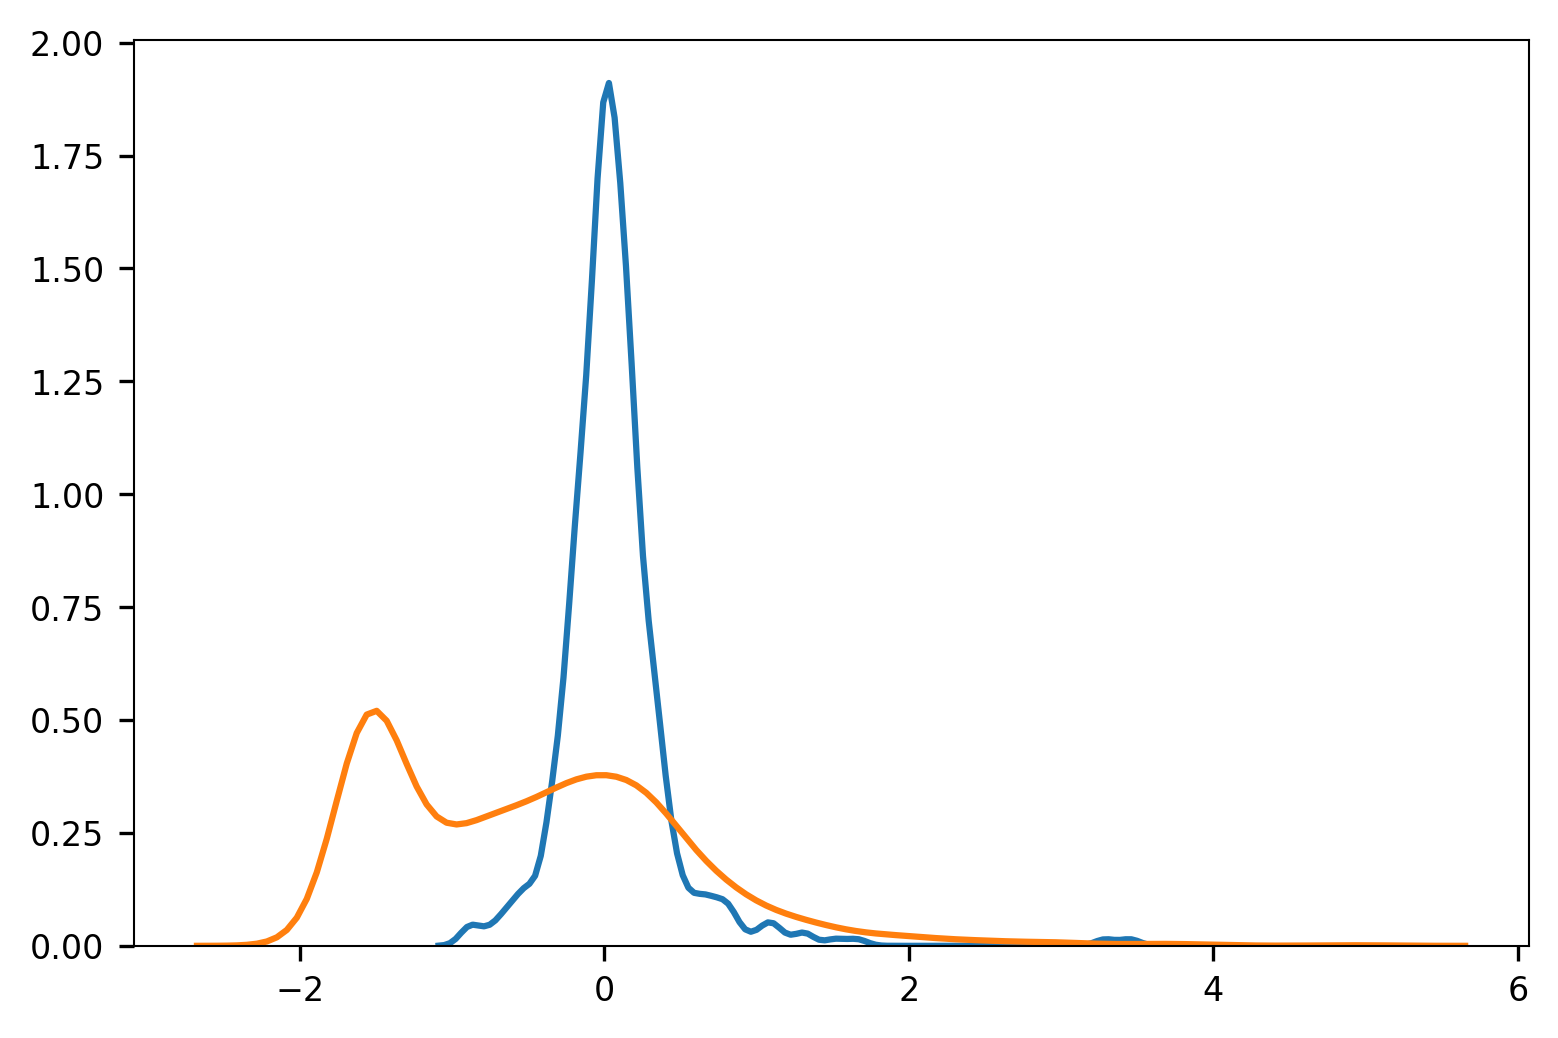

In [83]:
ax = f3_ax4
# Get nucleotide variants to differentiate synonymous and nonsynon
variants = raw_data.select('/main/variants/scores_shared')

# Separate into nonsyn and syn lists
synon = []
nonsynon = []
synon_names = []  # This was manually confirmed to be correct later
for variant in variants.index.tolist():
    if (variant.count('(p.=)') == variant.count('(p.')) or (variant == "_wt"):
        synon.append(variants.loc[variant].values[1::2][:2])  # Weird indexing to get scores
        synon_names.append(variant)
    else:
        nonsynon.append(variants.loc[variant].values[1::2][:2])  # Weird indexing again
        
# Flip scores because of negative selection
synon = -1 * np.array(synon).flatten()
#nonsynon = -1 * np.array(nonsynon).flatten()
nonsynon = pd.read_csv('../../../utils/point_muts.csv', index_col=0, header=[0,1])[2:].loc[:, ('Zero', 'score')].values


# Use seaborn to get the density plot
synon_plot = sns.distplot(synon, hist=False)
synon_mean = np.nanmean(synon)
synon_sd = np.nanstd(synon)
print(synon_mean, synon_sd, synon_mean - 2 * synon_sd, synon_mean + 2 * synon_sd)
print('synon IQR', scipy.stats.iqr(synon, nan_policy='omit'))
print('nonsynon IQR', scipy.stats.iqr(nonsynon))
nonsynon_plot = sns.distplot(nonsynon, hist=False)

# Get data from seaborn plots
synon_lines = synon_plot.get_lines()[0].get_data()
nonsynon_lines = nonsynon_plot.get_lines()[1].get_data()

# Plot lines
norm_syn = synon_lines[1] / max(synon_lines[1])
norm_nonsynon = nonsynon_lines[1] / max(nonsynon_lines[1])
ax.plot(synon_lines[0], norm_syn, c='k')
ax.plot(nonsynon_lines[0], norm_nonsynon, c='k')

# Plot limits
ax.set_xlim([min_val, max_val])
ax.set_ylim([0, 1.4])

# Fill under the curve
ns_color = 'lightgrey'
s_color = 'grey'
ax.fill_between(nonsynon_lines[0], 0, norm_nonsynon, color=ns_color)
ax.fill_between(synon_lines[0], 0, norm_syn, color=s_color)

# Custom legend
legend_elements = [
    matplotlib.patches.Patch(facecolor=ns_color, edgecolor='k',label='Nonsynonymous'),
    matplotlib.patches.Patch(facecolor=s_color, edgecolor='k',label='Synonymous')
                  ]
ax.legend(handles=legend_elements, frameon=False)

# Set axes labels
ax.set_xlabel('Radicicol activity score')
ax.set_ylabel('Density')

In [84]:
rad_synon = synon

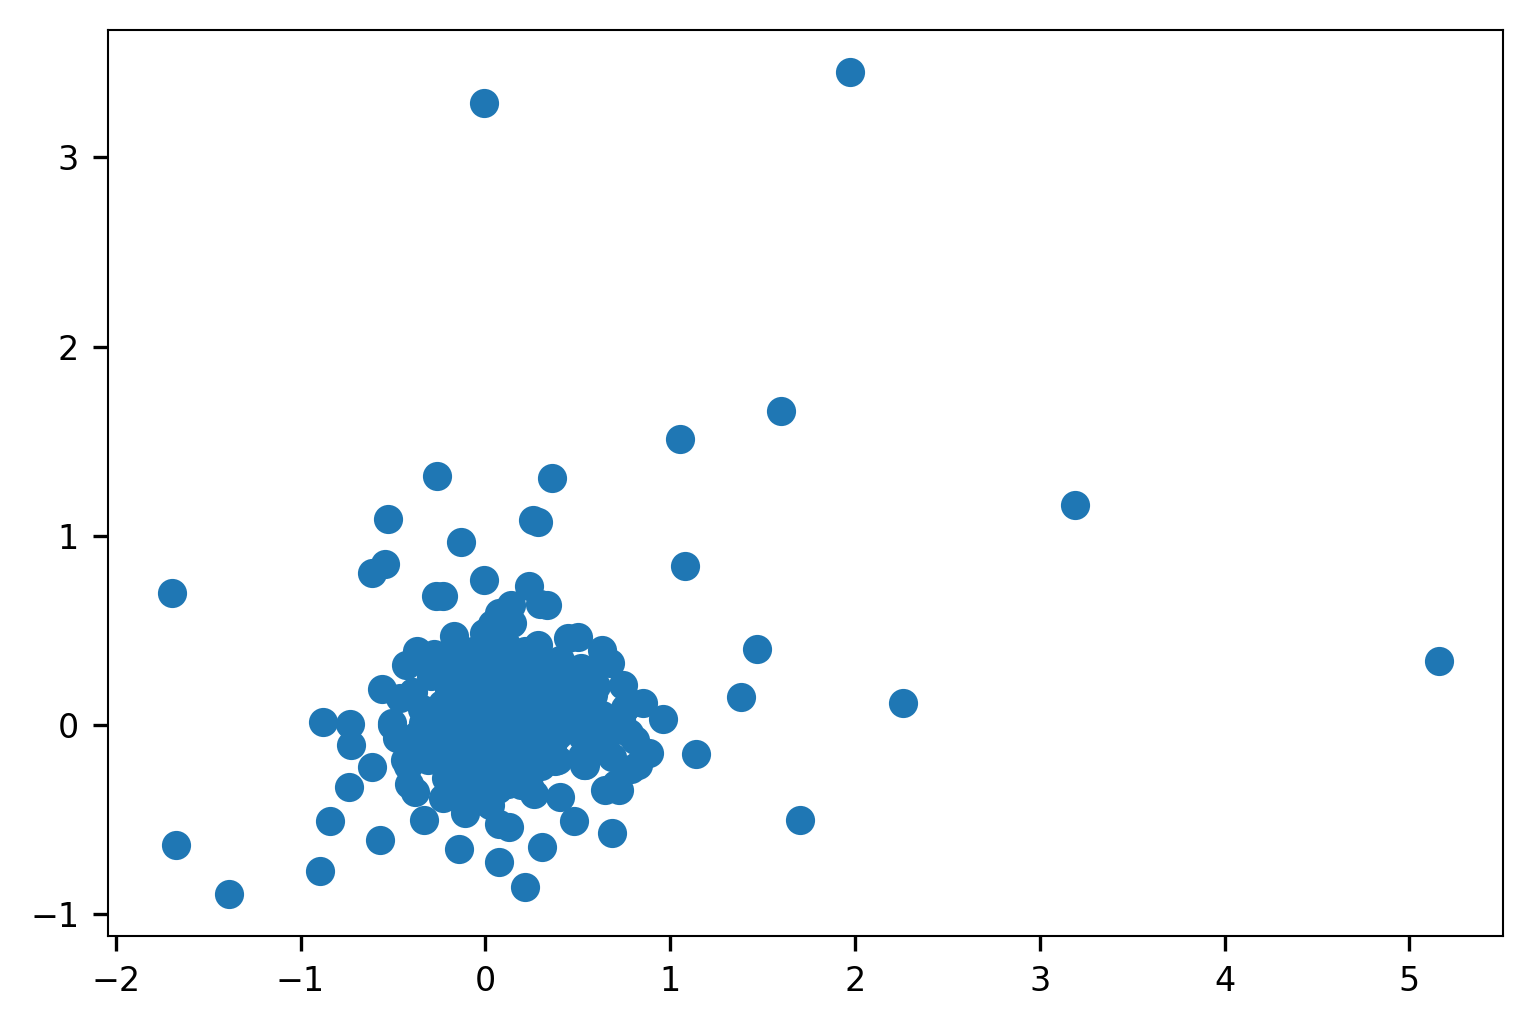

In [85]:

plt.scatter(dmso_synon, rad_synon)

# C. residual fit

In [11]:
ax = f3_ax3
# Read in data
point_muts = pd.read_csv('../../../utils/point_muts.csv', index_col=0, header=[0,1])
resids = pd.read_csv('../../../utils/residuals.csv', index_col=0)['raw_resids'].values
rad_scores = point_muts.loc[:, ('Radicicol', 'score')].values
dmso_scores = point_muts.loc[:, ('Zero', 'score')].values

# Fit data
coef = np.polyfit(dmso_scores, rad_scores, 1)
poly1d_fn = np.poly1d(coef) 

# Normalize residual score
max_abs = np.nanmax(abs(resids))

# Plot on grid
ax.scatter(dmso_scores, rad_scores, c=resids, cmap='bwr', vmin=-max_abs, vmax=max_abs)
ax.plot(dmso_scores, poly1d_fn(dmso_scores), color='k')

# Get limits
min_x, max_x = ax.get_xlim()
min_y, max_y = ax.get_ylim()
x_range = max_x - min_x
y_range = max_y - min_y

# Write text in top left corner
ax.text(min_x + perc_axes * x_range, max_y - perc_axes * y_range, '$y={:.2f}x{:.2f}$'.format(coef[0], coef[1]))

# Set axes labels
ax.set_xlabel('DMSO Activity score')
ax.set_ylabel('Radicicol activity score')

Text(1392.5459317585305, 0.5, 'Radicicol activity score')

# F. Histogram of client scores and coloring strong/weak/non clients

Text(1392.5459317585305, 0.5, 'Density')

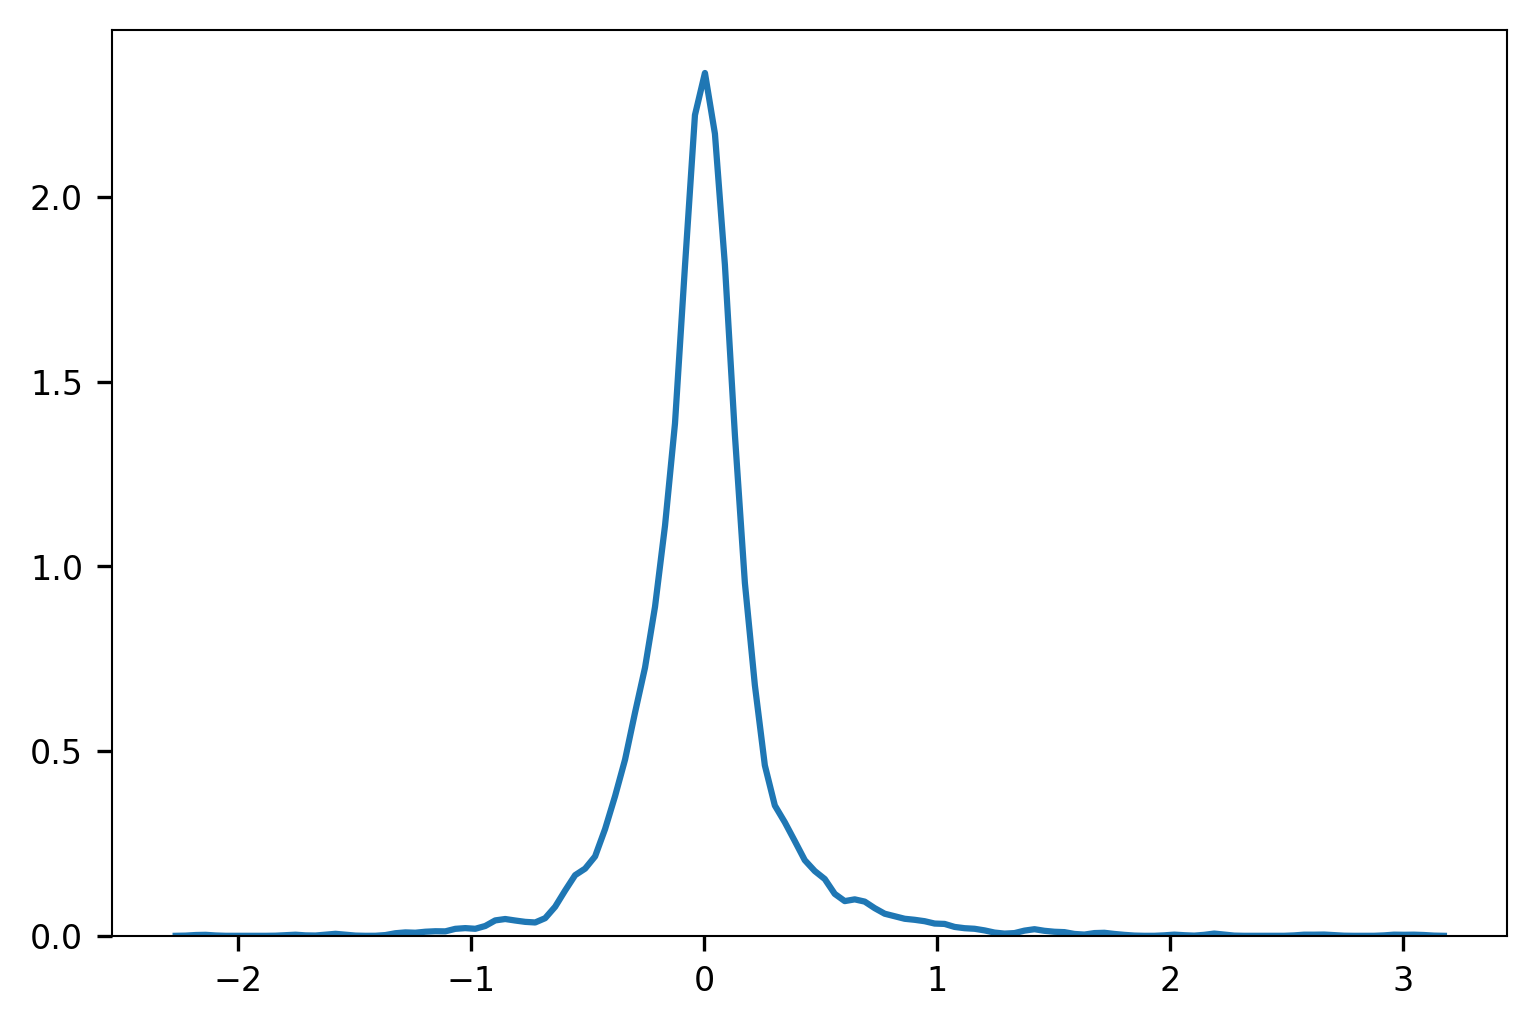

In [12]:
ax = f3_ax6
# Get seaborn distplot and plot myself
resid_dist = sns.distplot(resids, hist=False).get_lines()[0].get_data()

# Normalize top to 1
resid_dist_norm = resid_dist[1] / max(resid_dist[1])
ax.plot(resid_dist[0], resid_dist_norm, c='k')

# Set axes limits
ax.set_xlim([-2, 2])
ax.set_ylim([0, 1.6])

# Get std and mean to threshold
resid_std = np.nanstd(resids)
resid_mean = np.nanmean(resids)

# Get index of elements in x array that correspond to threshold values
def get_closest_element_index(arr, val):
    abs_arr = np.abs(arr - val)
    min_diff_idx = abs_arr.argmin()
    return(min_diff_idx)
nc_lower = get_closest_element_index(resid_dist[0], resid_mean - resid_std)
nc_upper = get_closest_element_index(resid_dist[0], resid_mean + resid_std)
dc2 = get_closest_element_index(resid_dist[0], resid_mean - 2 * resid_std)
ic2 = get_closest_element_index(resid_dist[0], resid_mean + 2 * resid_std)

# Get colors for different clients
cmap = matplotlib.cm.get_cmap('bwr')
nc_color = 'lightgrey'
dep1 = cmap(0.3)
ihb1 = cmap(0.8)

# Fill under the curve
ax.fill_between(x=resid_dist[0], y1=0, y2=resid_dist_norm, color=nc_color)
ax.fill_between(x=resid_dist[0][:nc_lower], y1=0, y2=resid_dist_norm[:nc_lower], color=dep1)
ax.fill_between(x=resid_dist[0][nc_upper:], y1=0, y2=resid_dist_norm[nc_upper:], color=ihb1)

# Custom legend
legend_elements = [
    matplotlib.patches.Patch(facecolor=nc_color, edgecolor='k',label='Nonclient'),
    matplotlib.patches.Patch(facecolor=dep1, edgecolor='k',label='Dependent client'),
    matplotlib.patches.Patch(facecolor=ihb1, edgecolor='k',label='Inhibited client')
                  ]
ax.legend(handles=legend_elements, frameon=False)

# Set axes labels
ax.set_xlabel('Client score')
ax.set_ylabel('Density')


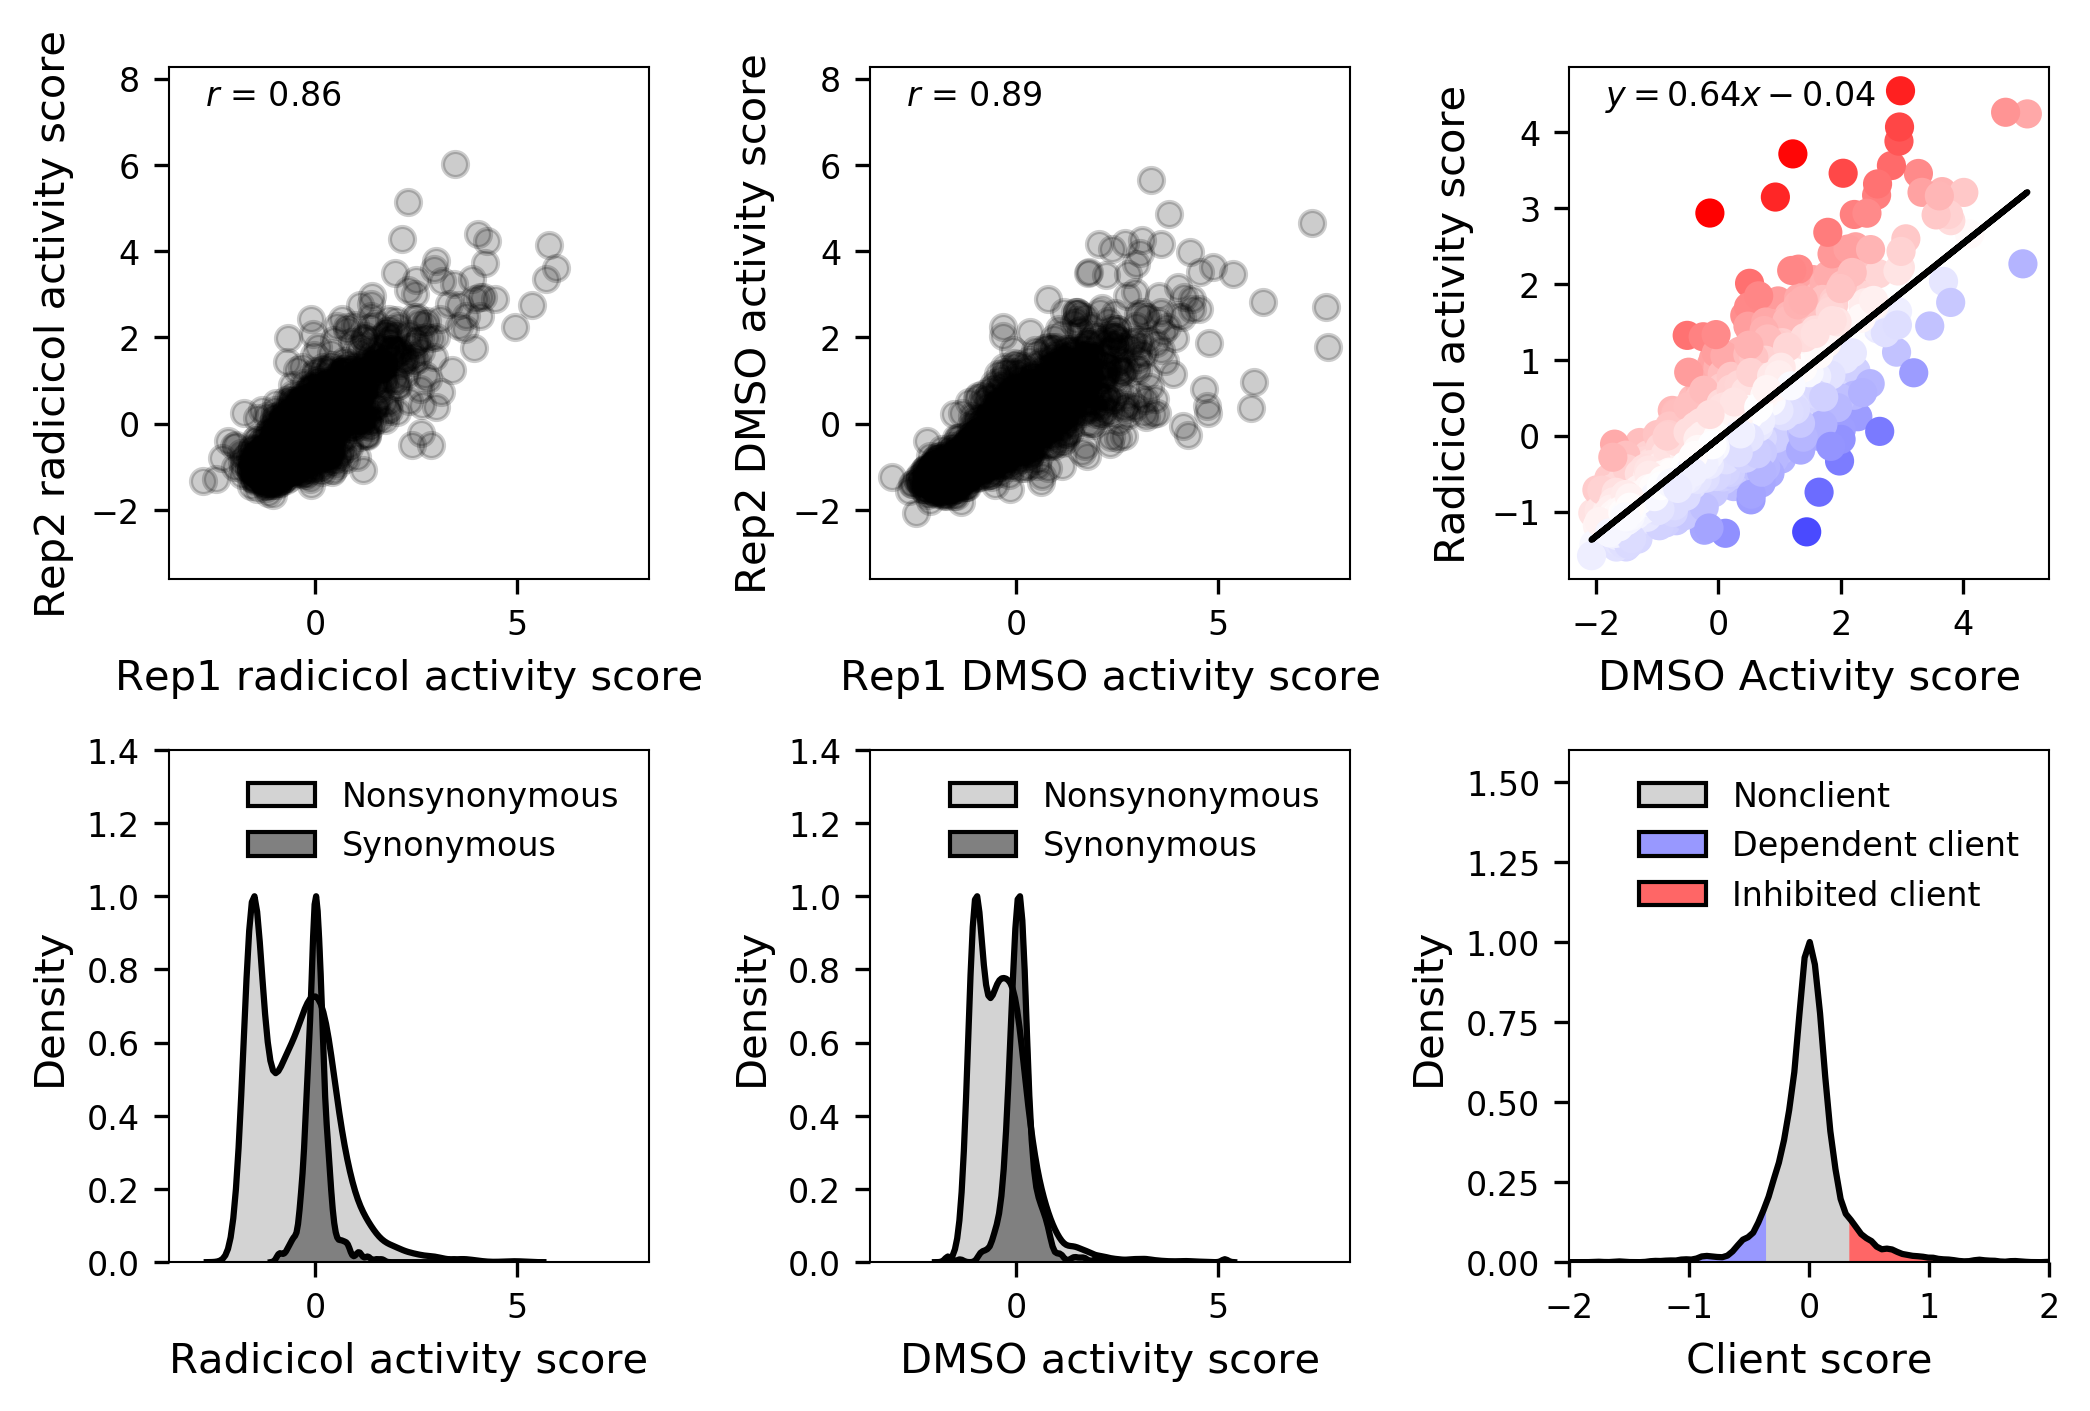

In [13]:
fig3

In [14]:
for ax in [f3_ax1, f3_ax2, f3_ax3, f3_ax4, f3_ax5, f3_ax6]:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

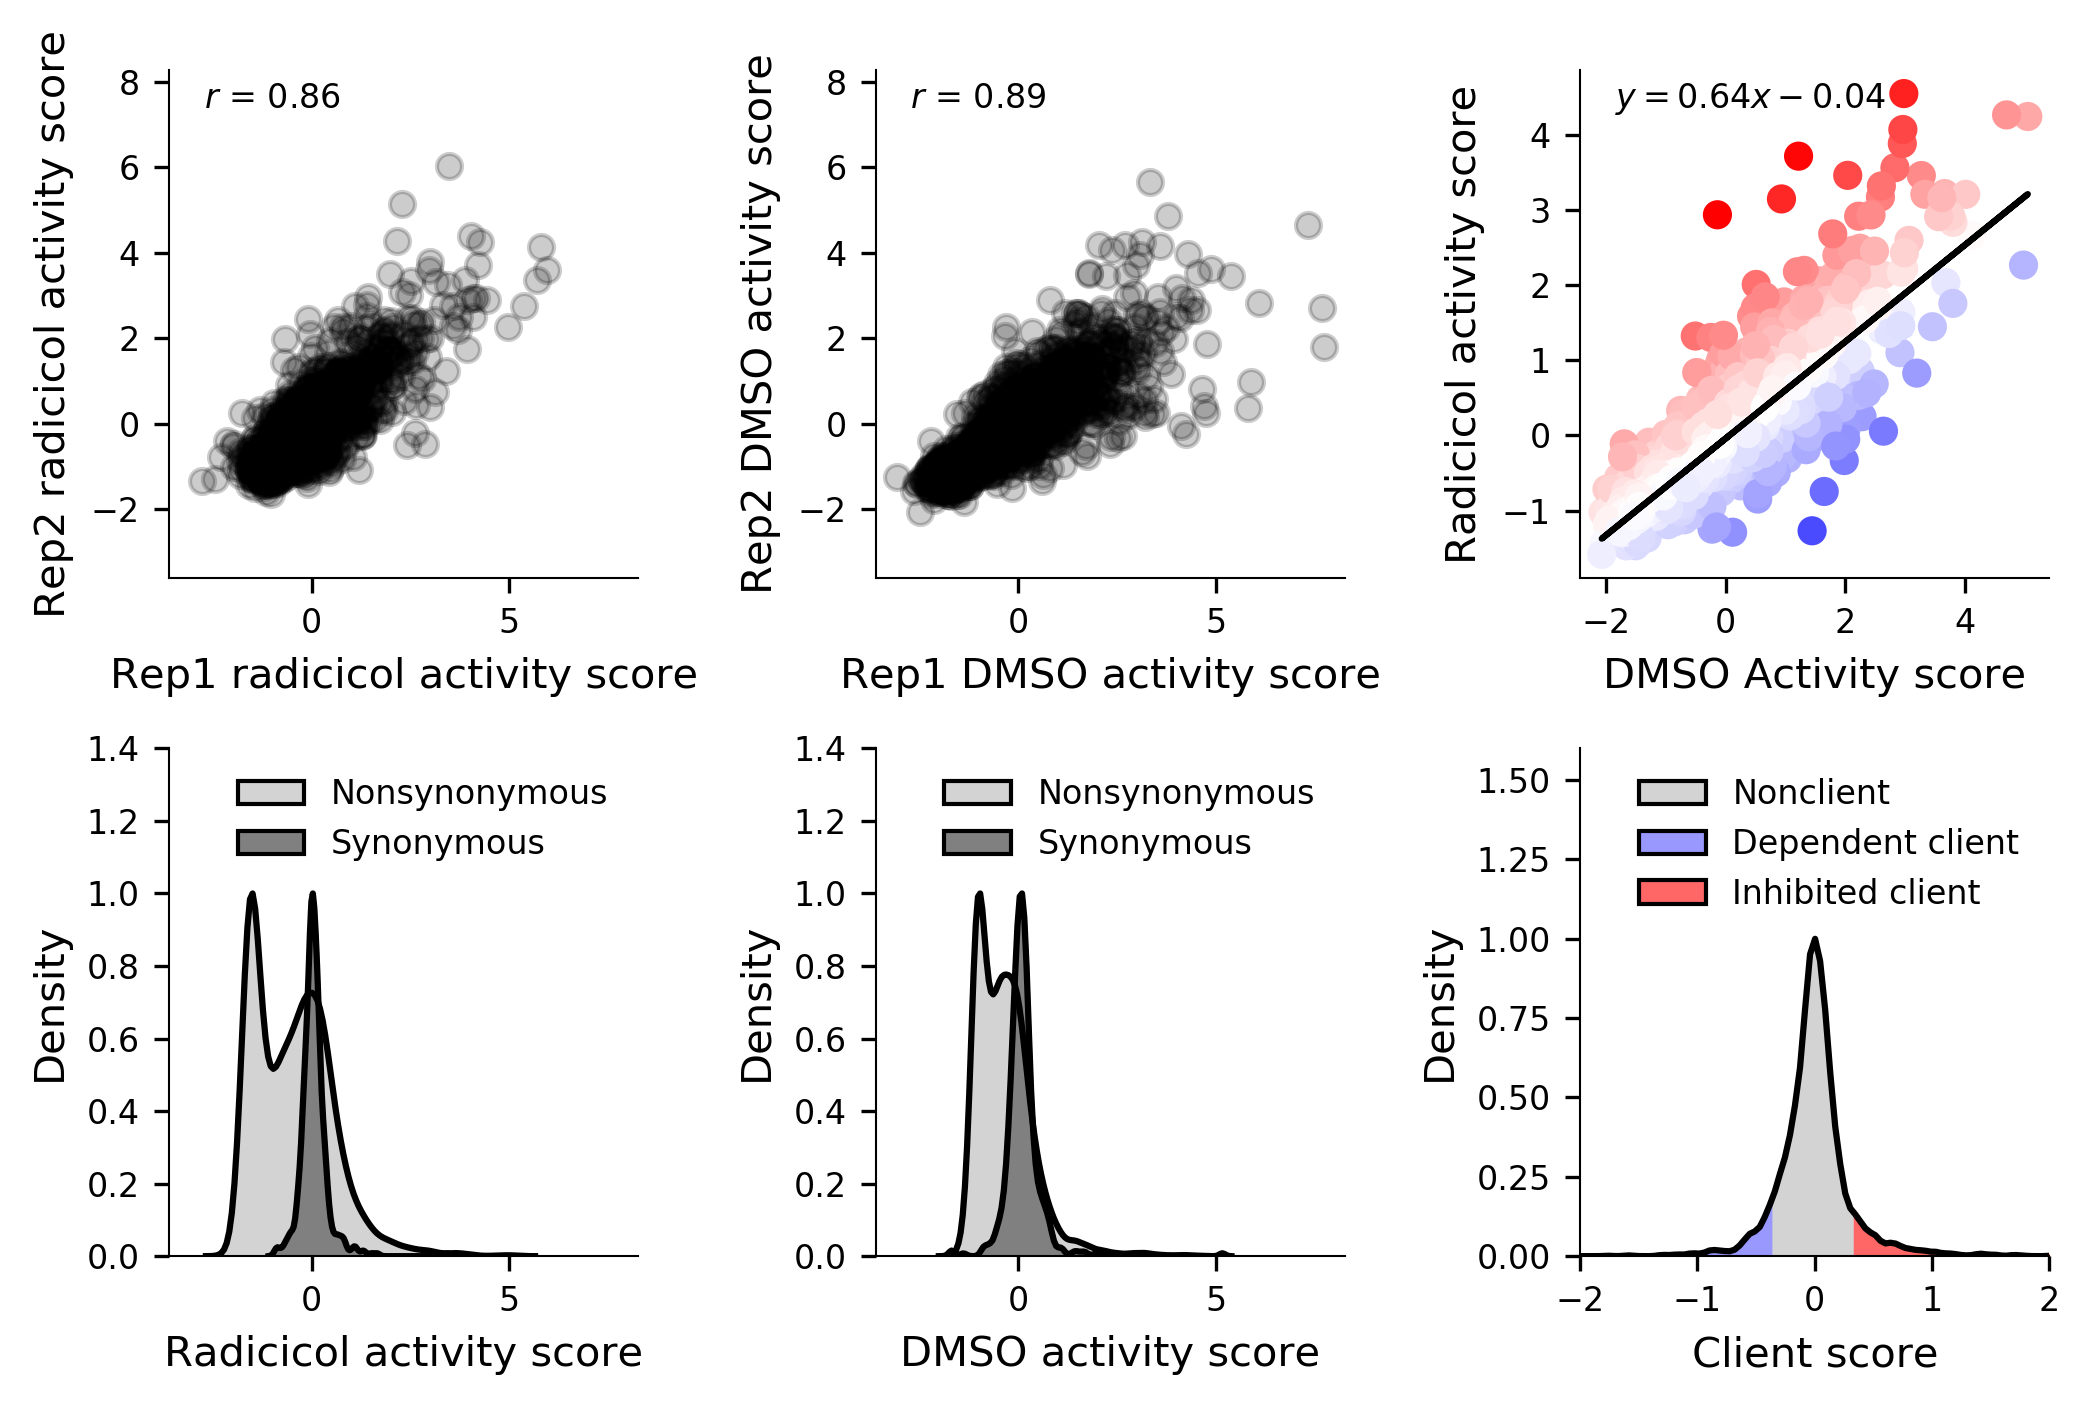

In [15]:
fig3

In [170]:
fig3.savefig('../../../Figures/manuscript_figs/fig2_drafts/fig2_v4.png')

# Follow up and for the supplement

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


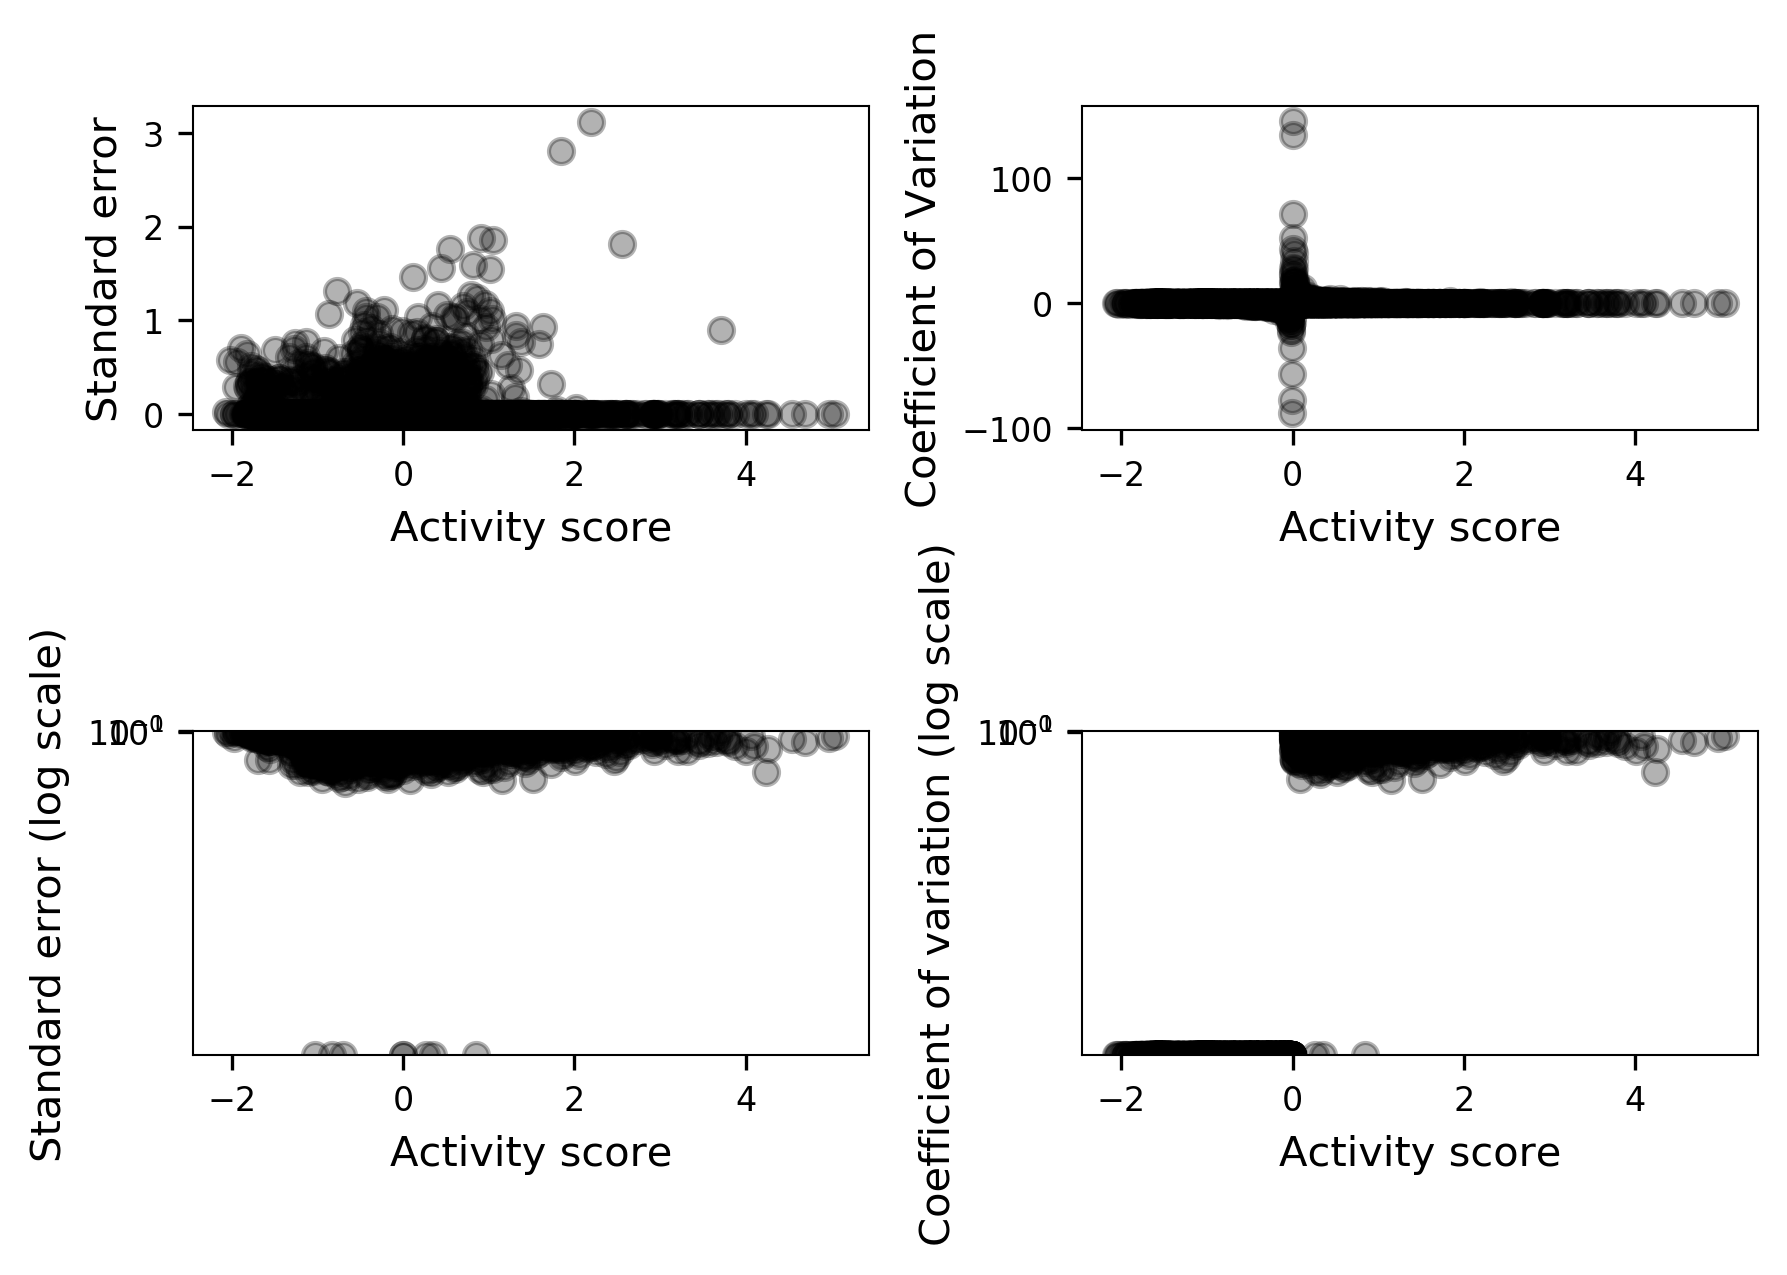

In [193]:
from scipy import stats
fig, ax = plt.subplots(2, 2, tight_layout=True)
se = point_muts.loc[:, ('Radicicol', 'SE')].values

rad_se = point_muts.loc[:, ('Radicicol', 'SE')].values 
zero_se = point_muts.loc[:, ('Zero', 'SE')].values

rad_cv = rad_se / rad_scores
zero_cv = zero_se / dmso_scores

scores = np.concatenate((rad_scores, rad_se))
se = np.concatenate((rad_se, zero_se))

ax[0, 0].scatter(rad_scores, rad_se, color='k', label='rad', alpha=0.3)
ax[0, 0].scatter(dmso_scores, zero_se, color='k', label='dmso', alpha=0.3)

ax[0, 1].scatter(rad_scores, rad_cv, color='k', label='rad', alpha=0.3)
ax[0, 1].scatter(dmso_scores, zero_cv, color='k', label='dmso', alpha=0.3)

ax[1, 0].scatter(rad_scores, rad_se, color='k', label='rad', alpha=0.3)
ax[1, 0].scatter(dmso_scores, zero_se, color='k', label='dmso', alpha=0.3)

ax[1, 1].scatter(rad_scores, rad_cv, color='k', label='rad', alpha=0.3)
ax[1, 1].scatter(dmso_scores, zero_cv, color='k', label='dmso', alpha=0.3)
#ax[0].scatter(rad_scores, se, c='k', alpha=0.3)


# Set axes labels
ax[0, 0].set_xlabel('Activity score')
ax[0, 0].set_ylabel('Standard error')

ax[0, 1].set_xlabel('Activity score')
ax[0, 1].set_ylabel('Coefficient of Variation')

ax[1, 0].set_xlabel('Activity score')
ax[1, 0].set_ylabel('Standard error (log scale)')
ax[1, 0].set_ylim([0, 3])
ax[1, 0].set_yscale('log')


ax[1, 1].set_xlabel('Activity score')
ax[1, 1].set_ylabel('Coefficient of variation (log scale)')
ax[1, 1].set_ylim([0, 3])
ax[1, 1].set_yscale('log')


# Get slope and p-value
#slope, intercept, r_value, p_value, std_err = stats.linregress(scores, se)

# Fit and plot line
#poly1d_fn = np.poly1d([slope, intercept])
#ax[0].plot(scores, poly1d_fn(scores), color='k')


# Get limits
#min_x, max_x = ax[0].get_xlim()
#min_y, max_y = ax[0].get_ylim()
#x_range = max_x - min_x
#y_range = max_y - min_y

# Write text in top left corner
#ax[0].text(min_x + perc_axes * x_range, max_y - perc_axes * y_range, '$slope={:.2f}$'.format(slope))
#ax[0].text(min_x + perc_axes * x_range, max_y - (perc_axes + 0.075) * y_range, '$p={:.2E}$'.format(p_value))

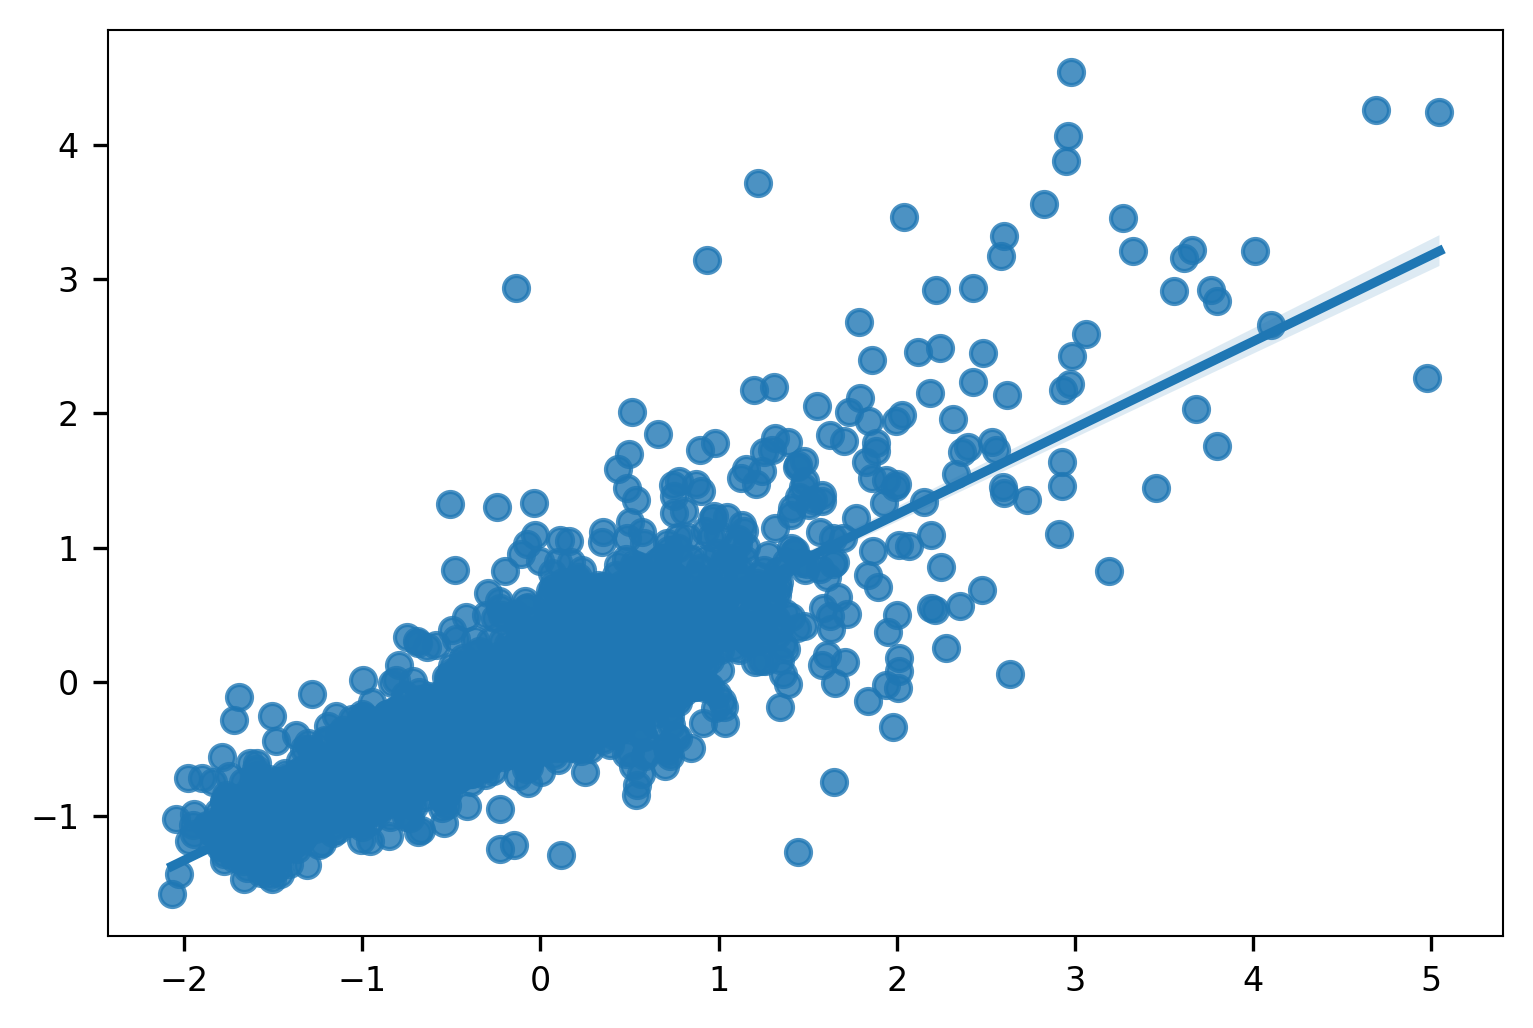

In [194]:
sns.regplot(dmso_scores, rad_scores)